# A1.6 Regresión no lineal


Andrés Luna de la Garza #608994
<br><br>



<br><br>
1. Importa los datos del archivo “Tiempo de entrega.csv” a tu ambiente de trabajo. Este
archivo lo encontrarás en la misma página donde descargaste esta plantilla. Genera una
gráfica de dispersión que muestre el comportamiento de los datos. Agrega una línea de
texto en la que generes una predicción sobre qué tipo de algoritmo será el más adecuado
para resolver la tarea (no hay respuestas correctas).
.  <br><br>

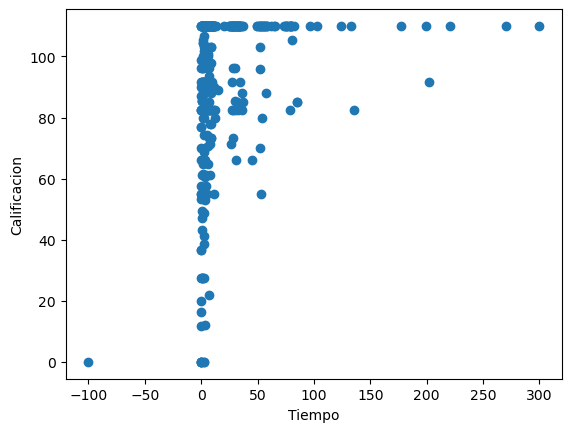

Debido a la tendencia de los datos retraídos y comportamiento, el algoritmo que mejor pudiera analizar estos mismos podría ser un modelo de regresión no lineal
Además, se realizó un filtro en los datos manteniendo aquellos datos lógicos o con coherencia a lo analizado


In [110]:
import pandas as pd
data= pd.read_csv("A1.6 Tiempo de Entrega.csv")
data["Calificacion"]= pd.to_numeric(data["Calificacion"], errors= "coerce")
data= data.dropna()
data= data[data["Tiempo"] <500]
import matplotlib.pyplot as plt
%matplotlib inline
# Gráfica de dispersión
plt.scatter(data["Tiempo"], data["Calificacion"]) 
plt.xlabel("Tiempo")
plt.ylabel("Calificacion")
plt.show()
print("Debido a la tendencia de los datos retraídos y comportamiento, el algoritmo que mejor pudiera analizar estos mismos podría ser un modelo de regresión no lineal")
print("Además, se realizó un filtro en los datos manteniendo aquellos datos lógicos o con coherencia a lo analizado")
#En este paso primero se importó la librería pandas, luego se realizó la lectura del archivo y el almacenamiento la información en la variable data.
#Después se realizó la gráfica de dispersión en base a los datos

<br><br>
2. Separa los datos en entrenamiento y prueba, con una relación de 70/30. Imprime en
consola el promedio de los tiempos en el conjunto de entrenamiento y en el conjunto de
prueba. Haz lo mismo para las calificaciones. Incluye una línea de texto donde comentes
sobre la similitud o diferencia de los valores promedio entre el conjunto de entrenamiento
y el de validación, y cómo es que esto podría afectar al análisis.


In [114]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, Y_train, Y_test = train_test_split(data.Tiempo,data.Calificacion,train_size = 0.7, random_state=42)

print("Promedio de Tiempo de entrenamiento", np.mean(X_train))
print("Promedio de Tiempo de prueba", np.mean(X_test))
print("Promedio de Calificacion de entrenamiento", np.mean(Y_train))
print("Promedio de Calficacion de prueba", np.mean(Y_test))
print(" ")
print("Como se puede apreciar, los promedios de entrenamiento y prueba de Calificacion son mas cercanos a comparación con los de Tiempo. En este caso, tendríamos mayor confianza en los resultados de de Calificación por su similitud o cercanía (a diferencia de Tiempo de 3 unidades). Esto no tendría un impacto significativo en el análisis pero se considera relevante denotarlo para la interpretación de la información")
#En esta sección se realiza el proceos de entrenamiento y prueba de los datos con una relación 70/30 para los tiempos y calificaciones
#Se arroja el comentario respecto al análisis

Promedio de Tiempo de entrenamiento 18.48618381800671
Promedio de Tiempo de prueba 15.49178725216279
Promedio de Calificacion de entrenamiento 94.71053104026845
Promedio de Calficacion de prueba 94.82845062015504
 
Como se puede apreciar, los promedios de entrenamiento y prueba de Calificacion son mas cercanos a comparación con los de Tiempo. En este caso, tendríamos mayor confianza en los resultados de de Calificación por su similitud o cercanía (a diferencia de Tiempo de 3 unidades). Esto no tendría un impacto significativo en el análisis pero se considera relevante denotarlo para la interpretación de la información


<br><br>3. Entrena un modelo de regresión polinomial usando los datos de entrenamiento; puedes
usar el orden de polinomial que consideres más adecuado. Imprime un resumen de los
resultados obtenidos y agrega una línea de texto en la que comentes sobre el tipo de
relación (positiva o negativa; ¿a menor tiempo menor calificación?) entre el término lineal
y la respuesta, lo que esto significa y si dicha variable está significativamente asociada
con las calificaciones.

<br><br>

In [116]:
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

Xtemp_train = X_train.values.reshape(-1,1)
Xtemp_test = X_test.values.reshape(-1,1)

poly = PolynomialFeatures(degree=2)
Xq_train = poly.fit_transform(Xtemp_train)
Xq_test = poly.transform(Xtemp_test)

# Ajustar modelo con statsmodels (agregar intercepto)
Xq_train_sm = sm.add_constant(Xq_train)
mq = sm.OLS(Y_train, Xq_train_sm).fit()

print(mq.summary())
print(mq.pvalues)

print("Tomando en cuenta el valor del coeficiente lineal (0.3897), el modelo cuenta con una relación positiva en donde, la calificación aumenta cuando el tiempo aumenta. En otras palabras, se identifica la relación de a mayor tiempo, mayor calificación")
print("En terminos de asociación significativa, el valor del p-value nos indica que es menor a 0.05, por lo que tiene asociación significativa con las calificaciones")
#En este apartado se realiza el procedimiento de un modelo de regresión polinomial con los datos de entrenamiento
#Se cambian de forma los datos para poder trabajar con ellos
#Posteriormente se ajusta el modelo y se demuestra un resumen a través de los resultados de regresión OLS.

                            OLS Regression Results                            
Dep. Variable:           Calificacion   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     15.75
Date:                Mon, 01 Sep 2025   Prob (F-statistic):           3.17e-07
Time:                        07:53:12   Log-Likelihood:                -1358.3
No. Observations:                 298   AIC:                             2723.
Df Residuals:                     295   BIC:                             2734.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.9275      1.592     56.491      0.0

<br><br>4.Entrena un modelo de regresión segmentada, siguiendo la misma estrategia utilizada en
la lectura interactiva, utilizando regresiones cuadráticas para cada segmento. Genera
estimaciones (predicciones) en los datos de validación. Asegúrate de usar la función
descrita en la lectura interactiva, instalándola en tu ambiente de trabajo en caso de no
haberlo hecho previamente.
<br><br>

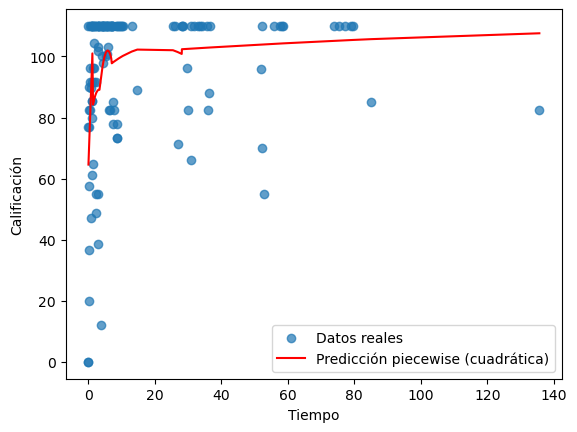

In [121]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, RegressorMixin
from mlinsights.mlmodel import PiecewiseRegressor

class SWIgnoreWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, estimator): self.estimator = estimator
    def fit(self, X, y, sample_weight=None): return self.estimator.fit(X, y)
    def predict(self, X): return self.estimator.predict(X)
X_train_2d = np.asarray(X_train).reshape(-1, 1)
X_test_2d  = np.asarray(X_test).reshape(-1, 1)
quad_model = SWIgnoreWrapper(make_pipeline(PolynomialFeatures(2), LinearRegression()))
ms = PiecewiseRegressor('bins', estimator=quad_model)
ms.fit(X_train_2d, Y_train)
Y_pred = ms.predict(X_test_2d)
df_plot = pd.DataFrame({"X": X_test_2d[:,0], "Y_pred": Y_pred})
df_plot = df_plot.sort_values("X")
plt.scatter(X_test_2d, Y_test, label="Datos reales", alpha=0.7)
plt.plot(df_plot["X"], df_plot["Y_pred"], "r-", label="Predicción piecewise (cuadrática)")
plt.xlabel("Tiempo")
plt.ylabel("Calificación")
plt.legend()
plt.show()

#Para este, se descargó los insights de mlinsights en conda
#Después se realiza un método de SWIgnoreWrapper debido al sample weight del .csv en relación al piecewiseregressor
#Luego se le cambió la forma a los datos para poder trabajar con ellos y se utilizó el PiecewiseRegressor
#Por consiguiente, se entrenaron lso datos y se realizó la predicción
#Por último se cambiaro los datos a panda Dataframe y se graficaron los datos

<br><br>5.Entrena un modelo KNN para regresión utilizando el valor de k que consideres adecuado
(o prueba con varios). Genera estimaciones en los datos de validación.
<br><br>

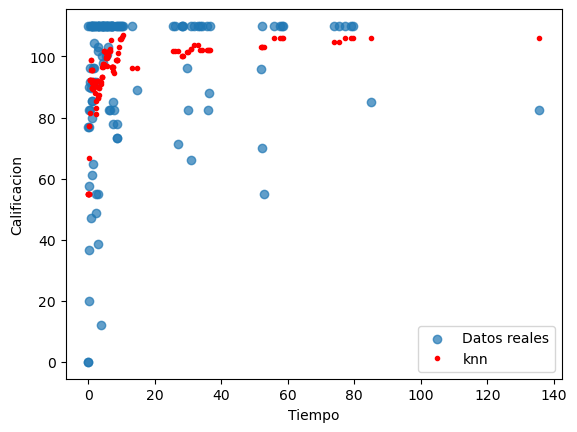

In [122]:
from sklearn.neighbors import KNeighborsRegressor as KNN
mk = KNN(n_neighbors=15).fit(Xtemp_train,Y_train)
yHat_mk = mk.predict(Xtemp_test)
plt.scatter(X_test, Y_test, label="Datos reales", alpha=0.7)
plt.plot(X_test,yHat_mk,"r.",label="knn")
plt.legend()
plt.xlabel("Tiempo")
plt.ylabel("Calificacion")
plt.show()

#Para entrenar el modelo KNN, se importa su respectiva librería y se obtiene la predicción de los datos
#Después se realiza la gráfica de este modelo considerarndo n_neighbors de 15

<br><br>6. Calcula el RSE en los datos de prueba para los 3 modelos y agrega una línea de texto
donde comentes sobre sus diferencias y si hay un claro “ganador”. No te bases
exclusivamente en el error, puedes considerar también aspectos como la interpretabilidad
del modelo.

<br><br>

In [137]:
import statsmodels.api as sm

# Modelo 1
Xq_test_sm = sm.add_constant(Xq_test)  # Aseguramos constante
yHat_mq = mq.predict(Xq_test_sm)
RSS_mq = np.sum((Y_test - yHat_mq)**2)
RSE_mq = np.sqrt(RSS_mq / (len(Y_test) - len(mq.params)))  # grados de libertad = n - p
print("RSE del modelo cuadrático:", RSE_mq)

# Modelo 2
Y_pred_ms = ms.predict(X_test_2d)
RSS_ms = np.sum((np.asarray(Y_test) - Y_pred_ms)**2)
RSE_ms = np.sqrt(RSS_ms / (len(Y_test) - 1))
print("RSE del modelo segmentado cuadrático:", RSE_ms)

# Modelo 3
yHat_mk = mk.predict(Xtemp_test)
RSS_mk = np.sum((np.asarray(Y_test) - yHat_mk)**2)
RSE_mk = np.sqrt(RSS_mk / (len(Y_test) - 1))  
print("RSE del modelo KNN:", RSE_mk)
print(" ")

print("R^2 del modelo Polinomial:", r2_score(Y_test, yHat_mq))
print("R^2 del modelo Segmentado:", r2_score(Y_test, Y_pred))
print("R^2 del modelo KNN:", r2_score(Y_test, yHat_mk))

print("Como se puede observar, el modelo que cuenta con menor error RSE y mayor R^2 es el modelo KNN. No obstante, dicho modelo no otorga tanta interpretabilidad de los datos. Para esto, el segmento cuadrático sería el adecuado ya que mantiene una forma de regresión con segmentos siendo también el segundo modelo con mayor R^2, captando mejor la relación")

#En este punto del procedimiento se calucla el RSS y RSE de cada modelo y se compararan estos mismos

RSE del modelo cuadrático: 23.844584282369986
RSE del modelo segmentado cuadrático: 21.069582375206434
RSE del modelo KNN: 20.004029538140514
 
R^2 del modelo Polinomial: 0.012696192222141245
R^2 del modelo Segmentado: 0.21689034016785447
R^2 del modelo KNN: 0.2940959061912414
Como se puede observar, el modelo que cuenta con menor error RSE es el modelo KNN. No obstante, dicho modelo no otorga tanta interpretabilidad de los datos. Para esto, el segmento cuadrático sería el adecuado ya que mantiene una forma de regresión con segmentos


<br><br>7. Para los datos de prueba, grafica tanto las calificaciones reales como las predichas por
los 3 modelos en un mismo plot, asegurándote de utilizar etiquetas, colores y/o distintos
marcadores para diferenciar y describir a cada modelo.

<br><br>

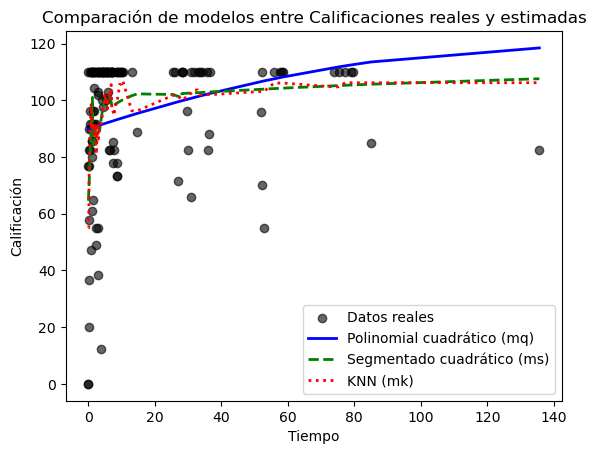

In [134]:
data_mq = pd.DataFrame({"X": X_test, "Y": yHat_mq}).sort_values("X")
data_ms = pd.DataFrame({"X": X_test_2d[:,0], "Y": Y_pred_ms}).sort_values("X")
data_mk = pd.DataFrame({"X": X_test, "Y": yHat_mk}).sort_values("X")

plt.scatter(X_test, Y_test, color='black', marker='o', alpha=0.6, label='Datos reales')

plt.plot(df_mq["X"], df_mq["Y"], color='blue', linestyle='-', linewidth=2, label='Polinomial cuadrático (mq)')
plt.plot(df_ms["X"], df_ms["Y"], color='green', linestyle='--', linewidth=2, label='Segmentado cuadrático (ms)')
plt.plot(df_mk["X"], df_mk["Y"], color='red', linestyle=':', linewidth=2, label='KNN (mk)')

plt.xlabel('Tiempo')
plt.ylabel('Calificación')
plt.title('Comparación de modelos entre Calificaciones reales y estimadas')
plt.legend()
plt.show()

#Por último, se crean los Dataframes para cada modelo
#Después se grafican los datos reales y posteriormente los de cada modelo

<br>Código de Honor: Yo, Andrés Luna de la Garza, doy mi palabra que he realizado esta actividad con integridad académica